# Playing with Classifiers

## Integration test with Genetic Search
This section of notebook tests checks that classifiers can be used with Genetic Search. It is essentially the pipe example for segmentors, but using classifiers.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from see import classifiers
from sklearn.datasets import make_moons, make_circles, make_classification

algorithm_space = classifiers.Classifier.algorithmspace
X, y = make_moons(noise=0.3, random_state=0)
#X, y = make_circles(noise=0.2, factor=0.5, random_state=1)

In [2]:
from see.classifiers import Classifier
from see.classifier_fitness import ClassifierFitness
from see.Workflow import workflow

workflow.addalgos([Classifier, ClassifierFitness])
wf = workflow()
print(wf)

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 200
	alpha = 0.0001
	max_depth = 1
	n_estimators = 100
	n_neighbors = 5



In [3]:
from see.base_classes import pipedata
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler

individual = Classifier()

dataset = pipedata()
training_set = pipedata()
testing_set = pipedata()

# Preprocess data
X = StandardScaler().fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.4, random_state=42)

training_set.X = X_train
training_set.y = y_train
testing_set.X = X_test
testing_set.y = y_test

dataset.training_set = training_set
dataset.testing_set = testing_set

dataset.k_folds = False

# Split data into training and testing sets using KFolds
kf = KFold(n_splits=2)
folds = list(kf.split(X))
n_splits = kf.get_n_splits(X)

dataset.training_folds = np.empty(n_splits,dtype=object)
dataset.testing_folds = np.empty(n_splits,dtype=object)

for i, train_test_index in enumerate(kf.split(X)):
    train_index, test_index = train_test_index
    training_fold = pipedata()
    testing_fold = pipedata()
    training_fold.X, testing_fold.X = X[train_index], X[test_index]
    training_fold.y, testing_fold.y = y[train_index], y[test_index]
    dataset.training_folds[i] = training_fold
    dataset.testing_folds[i] = testing_fold

dataset.k_folds = True

individual.runAlgo(dataset)

data <see.base_classes.pipedata object at 0x7f4c00fbbdf0>
<class 'see.classifiers.Classifier'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 200
	alpha = 0.0001
	max_depth = 1
	n_estimators = 100
	n_neighbors = 5

Time: 0.426 s


## Genetic Search with Classifiers

In [4]:
from see import GeneticSearch

In [5]:
mydata = dataset

In [6]:
my_evolver = GeneticSearch.Evolver(workflow, mydata, pop_size=10)

In [7]:
# warnings may appear when this runs
population = my_evolver.run(ngen=20)

Initializing a new random population
Generation 0/20 of population size 10
data <see.base_classes.pipedata object at 0x7f4c005a8460>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = Decision Tree
	max_iter = 901
	alpha = 0.0557
	max_depth = 818
	n_estimators = 817
	n_neighbors = 370

predictions [0 1 1 1 1 1 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0
 0 0 1 1 1 0 0 0 0 0 0 0 1]
targets [0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0
 1 1 1 0 1 0 0 0 0 0 0 0 0]
predictions [0 1 0 0 1 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1
 0 1 1 1 0 0 1 0 1 1 1 0 0]
targets [1 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1
 0 1 1 1 0 0 1 0 1 1 1 0 0]
Time: 0.004 s
fitness=0.12

data <see.base_classes.pipedata object at 0x7f4c005a8310>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 388
	alpha = 0.8006
	max_depth = 297
	n_estimators = 867
	n_neighbors = 225



predictions [0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0
 0 0 1 1 1 0 0 1 0 0 0 0 1]
targets [0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0
 1 1 1 0 1 0 0 0 0 0 0 0 0]
predictions [1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 0 0 0 1
 0 1 1 1 0 0 1 0 0 1 1 0 0]
targets [1 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1
 0 1 1 1 0 0 1 0 1 1 1 0 0]
Time: 0.364 s
fitness=0.16

data <see.base_classes.pipedata object at 0x7f4c005b0760>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = Decision Tree
	max_iter = 883
	alpha = 0.1165
	max_depth = 233
	n_estimators = 237
	n_neighbors = 198

predictions [0 1 1 1 1 1 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0
 0 0 1 1 1 0 0 0 0 0 0 0 1]
targets [0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0
 1 1 1 0 1 0 0 0 0 0 0 0 0]
predictions [0 1 0 0 1 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 

predictions [0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0
 0 0 1 1 1 0 0 0 0 0 0 0 1]
targets [0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0
 1 1 1 0 1 0 0 0 0 0 0 0 0]
predictions [1 0 0 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1
 0 1 1 1 0 0 1 0 1 1 1 0 0]
targets [1 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1
 0 1 1 1 0 0 1 0 1 1 1 0 0]
Time: 1.618 s
fitness=0.09000000000000001

data <see.base_classes.pipedata object at 0x7f4c00534ee0>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = Decision Tree
	max_iter = 920
	alpha = 0.4701
	max_depth = 564
	n_estimators = 781
	n_neighbors = 329

predictions [0 1 1 1 1 1 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0
 0 0 1 1 1 0 0 0 0 0 0 0 1]
targets [0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0
 1 1 1 0 1 0 0 0 0 0 0 0 0]
predictions [0 1 0 0 1 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1

predictions [0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0
 0 0 1 1 1 0 0 0 0 0 0 0 1]
targets [0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0
 1 1 1 0 1 0 0 0 0 0 0 0 0]
predictions [1 0 0 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1
 0 1 1 1 0 0 1 0 1 1 1 0 0]
targets [1 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1
 0 1 1 1 0 0 1 0 1 1 1 0 0]
Time: 1.545 s
fitness=0.09000000000000001

data <see.base_classes.pipedata object at 0x7f4c005bdc40>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 522
	alpha = 0.5093
	max_depth = 400
	n_estimators = 470
	n_neighbors = 329

predictions [0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0
 0 0 1 1 1 0 0 0 0 0 0 0 1]
targets [0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0
 1 1 1 0 1 0 0 0 0 0 0 0 0]
predictions [1 0 0 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1

predictions [0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0
 0 0 1 1 1 0 0 0 0 0 0 0 1]
targets [0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0
 1 1 1 0 1 0 0 0 0 0 0 0 0]
predictions [1 0 0 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1
 0 1 1 1 0 0 1 0 1 1 1 0 0]
targets [1 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1
 0 1 1 1 0 0 1 0 1 1 1 0 0]
Time: 1.57 s
fitness=0.09000000000000001

data <see.base_classes.pipedata object at 0x7f4c0052faf0>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 522
	alpha = 0.5093
	max_depth = 400
	n_estimators = 470
	n_neighbors = 329

predictions [0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0
 0 0 1 1 1 0 0 0 0 0 0 0 1]
targets [0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0
 1 1 1 0 1 0 0 0 0 0 0 0 0]
predictions [1 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 

predictions [0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0
 0 0 1 1 1 0 0 0 0 0 0 0 1]
targets [0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0
 1 1 1 0 1 0 0 0 0 0 0 0 0]
predictions [1 0 0 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1
 0 1 1 1 0 0 1 0 1 1 1 0 0]
targets [1 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1
 0 1 1 1 0 0 1 0 1 1 1 0 0]
Time: 1.484 s
fitness=0.09000000000000001

data <see.base_classes.pipedata object at 0x7f4c0052fa30>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 522
	alpha = 0.5093
	max_depth = 400
	n_estimators = 470
	n_neighbors = 329

predictions [0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0
 0 0 1 1 1 0 0 0 0 0 0 0 1]
targets [0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0
 1 1 1 0 1 0 0 0 0 0 0 0 0]
predictions [1 0 0 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1

predictions [0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0
 0 0 1 1 1 0 0 0 0 0 0 0 1]
targets [0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0
 1 1 1 0 1 0 0 0 0 0 0 0 0]
predictions [1 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1
 0 1 1 1 0 0 1 0 1 1 1 0 0]
targets [1 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1
 0 1 1 1 0 0 1 0 1 1 1 0 0]
Time: 1.51 s
fitness=0.08

data <see.base_classes.pipedata object at 0x7f4c00550910>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 522
	alpha = 0.5093
	max_depth = 400
	n_estimators = 470
	n_neighbors = 329

predictions [0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0
 0 0 1 1 1 0 0 0 0 0 0 0 1]
targets [0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0
 1 1 1 0 1 0 0 0 0 0 0 0 0]
predictions [1 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0

predictions [0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0
 0 0 1 1 1 0 0 0 0 0 0 0 1]
targets [0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0
 1 1 1 0 1 0 0 0 0 0 0 0 0]
predictions [1 0 0 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1
 0 1 1 1 0 0 1 0 1 1 1 0 0]
targets [1 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1
 0 1 1 1 0 0 1 0 1 1 1 0 0]
Time: 1.49 s
fitness=0.09000000000000001

data <see.base_classes.pipedata object at 0x7f4c005afb50>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 263
	alpha = 0.8535
	max_depth = 118
	n_estimators = 470
	n_neighbors = 45

predictions [0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0
 0 0 1 1 1 0 0 0 0 0 0 0 1]
targets [0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0
 1 1 1 0 1 0 0 0 0 0 0 0 0]
predictions [1 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1

predictions [0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0
 0 0 1 1 1 0 0 0 0 0 0 0 1]
targets [0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0
 1 1 1 0 1 0 0 0 0 0 0 0 0]
predictions [1 0 0 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1
 0 1 1 1 0 0 1 0 1 1 1 0 0]
targets [1 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1
 0 1 1 1 0 0 1 0 1 1 1 0 0]
Time: 1.596 s
fitness=0.09000000000000001

data <see.base_classes.pipedata object at 0x7f4c005501f0>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 263
	alpha = 0.8535
	max_depth = 400
	n_estimators = 967
	n_neighbors = 45

predictions [0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0
 0 0 1 1 1 0 0 0 0 0 0 0 1]
targets [0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0
 1 1 1 0 1 0 0 0 0 0 0 0 0]
predictions [1 0 0 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 

predictions [0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0
 0 0 1 1 1 0 0 0 0 0 0 0 1]
targets [0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0
 1 1 1 0 1 0 0 0 0 0 0 0 0]
predictions [1 1 0 0 1 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1
 0 1 1 1 0 0 1 0 1 1 1 0 0]
targets [1 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1
 0 1 1 1 0 0 1 0 1 1 1 0 0]
Time: 1.489 s
fitness=0.09000000000000001

data <see.base_classes.pipedata object at 0x7f4c005045e0>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 263
	alpha = 0.8535
	max_depth = 400
	n_estimators = 967
	n_neighbors = 45

predictions [0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0
 0 0 1 1 1 0 0 0 0 0 0 0 1]
targets [0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0
 1 1 1 0 1 0 0 0 0 0 0 0 0]
predictions [1 0 0 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 

predictions [0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0
 0 0 1 1 1 0 0 0 0 0 0 0 1]
targets [0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0
 1 1 1 0 1 0 0 0 0 0 0 0 0]
predictions [0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1
 0 1 1 1 0 0 1 0 1 1 1 0 0]
targets [1 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1
 0 1 1 1 0 0 1 0 1 1 1 0 0]
Time: 0.291 s
fitness=0.1

data <see.base_classes.pipedata object at 0x7f4c005af8b0>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 801
	alpha = 0.3952
	max_depth = 446
	n_estimators = 693
	n_neighbors = 302

RUNNING EVAL FOR KNN
N NEIGHBORS 302
PARAM IN RANGE False
RUNNING EVAL FOR KNN
N NEIGHBORS 302
PARAM IN RANGE False
predictions [0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 0 0
 1 1 1 1 1 0 0 0 0 0 0 0 0]
targets [0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 

predictions [0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0
 0 0 1 1 1 0 0 0 0 0 0 0 1]
targets [0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0
 1 1 1 0 1 0 0 0 0 0 0 0 0]
predictions [1 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1
 0 1 1 1 0 0 1 0 1 1 1 0 0]
targets [1 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1
 0 1 1 1 0 0 1 0 1 1 1 0 0]
Time: 2.936 s
fitness=0.08

data <see.base_classes.pipedata object at 0x7f4c0053c040>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 442
	alpha = 0.6292
	max_depth = 191
	n_estimators = 60
	n_neighbors = 171

predictions [0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0
 0 0 1 1 1 0 0 0 0 0 0 0 1]
targets [0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0
 1 1 1 0 1 0 0 0 0 0 0 0 0]
predictions [1 0 0 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0

predictions [0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0
 0 0 1 1 1 0 0 0 0 0 0 0 1]
targets [0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0
 1 1 1 0 1 0 0 0 0 0 0 0 0]
predictions [1 0 0 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1
 0 1 1 1 0 0 1 0 1 1 1 0 0]
targets [1 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1
 0 1 1 1 0 0 1 0 1 1 1 0 0]
Time: 2.771 s
fitness=0.09000000000000001

data <see.base_classes.pipedata object at 0x7f4c005afc10>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 442
	alpha = 0.6292
	max_depth = 191
	n_estimators = 693
	n_neighbors = 171

predictions [0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0
 0 0 1 1 1 0 0 0 0 0 0 0 1]
targets [0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0
 1 1 1 0 1 0 0 0 0 0 0 0 0]
predictions [1 0 0 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1

RUNNING EVAL FOR KNN
N NEIGHBORS 545
PARAM IN RANGE False
predictions [0 1 1 0 1 1 1 1 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 0
 0 0 1 1 1 0 0 1 0 0 0 0 1]
targets [0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0
 1 1 1 0 1 0 0 0 0 0 0 0 0]
predictions [1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 0 0 0 0
 0 1 1 1 0 0 1 0 1 1 1 0 0]
targets [1 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1
 0 1 1 1 0 0 1 0 1 1 1 0 0]
Time: 0.016 s
fitness=0.2

data <see.base_classes.pipedata object at 0x7f4c005315b0>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 936
	alpha = 0.3952
	max_depth = 118
	n_estimators = 903
	n_neighbors = 523

predictions [0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0
 0 0 1 1 1 0 0 0 0 0 0 0 1]
targets [0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0
 1 1 1 0 1 0 0 0 0 0 0 0 0]
predictions [1 1 0

predictions [0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0
 0 0 1 1 1 0 0 0 0 0 0 0 1]
targets [0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0
 1 1 1 0 1 0 0 0 0 0 0 0 0]
predictions [1 0 0 0 1 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1
 0 1 1 1 0 0 1 0 1 1 1 0 0]
targets [1 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1
 0 1 1 1 0 0 1 0 1 1 1 0 0]
Time: 2.698 s
fitness=0.1

data <see.base_classes.pipedata object at 0x7f4c005bdd00>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 596
	alpha = 0.2049
	max_depth = 118
	n_estimators = 60
	n_neighbors = 228

RUNNING EVAL FOR KNN
N NEIGHBORS 228
PARAM IN RANGE False
RUNNING EVAL FOR KNN
N NEIGHBORS 228
PARAM IN RANGE False
predictions [0 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0
 0 0 1 1 1 0 0 1 0 0 0 0 1]
targets [0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1

predictions [0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0
 0 0 1 1 1 0 0 0 0 0 0 0 1]
targets [0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0
 1 1 1 0 1 0 0 0 0 0 0 0 0]
predictions [1 0 0 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1
 0 1 1 1 0 0 1 0 1 1 1 0 0]
targets [1 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1
 0 1 1 1 0 0 1 0 1 1 1 0 0]
Time: 2.996 s
fitness=0.09000000000000001

data <see.base_classes.pipedata object at 0x7f4c00534e50>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 596
	alpha = 0.2049
	max_depth = 46
	n_estimators = 60
	n_neighbors = 228

predictions [0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0
 0 0 1 1 1 0 0 0 0 0 0 0 1]
targets [0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0
 1 1 1 0 1 0 0 0 0 0 0 0 0]
predictions [1 0 0 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1

predictions [0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0
 0 0 1 1 1 0 0 0 0 0 0 0 1]
targets [0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0
 1 1 1 0 1 0 0 0 0 0 0 0 0]
predictions [1 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1
 0 1 1 1 0 0 1 0 1 1 1 0 0]
targets [1 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1
 0 1 1 1 0 0 1 0 1 1 1 0 0]
Time: 2.842 s
fitness=0.08

data <see.base_classes.pipedata object at 0x7f4c00534760>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 596
	alpha = 0.2049
	max_depth = 46
	n_estimators = 60
	n_neighbors = 228

predictions [0 1 1 1 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0
 0 0 1 1 1 0 0 0 0 0 0 0 1]
targets [0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0
 1 1 1 0 1 0 0 0 0 0 0 0 0]
predictions [1 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 

predictions [0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0
 0 0 1 1 1 0 0 0 0 0 0 0 1]
targets [0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0
 1 1 1 0 1 0 0 0 0 0 0 0 0]
predictions [1 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1
 0 1 1 1 0 0 1 0 1 1 1 0 0]
targets [1 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1
 0 1 1 1 0 0 1 0 1 1 1 0 0]
Time: 3.032 s
fitness=0.08

data <see.base_classes.pipedata object at 0x7f4c0051de20>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 596
	alpha = 0.3952
	max_depth = 46
	n_estimators = 128
	n_neighbors = 228

RUNNING EVAL FOR KNN
N NEIGHBORS 228
PARAM IN RANGE False
RUNNING EVAL FOR KNN
N NEIGHBORS 228
PARAM IN RANGE False
predictions [0 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0
 0 0 1 1 1 0 0 1 0 0 0 0 1]
targets [0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 

predictions [0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0
 0 0 1 1 1 0 0 0 0 0 0 0 1]
targets [0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0
 1 1 1 0 1 0 0 0 0 0 0 0 0]
predictions [1 0 0 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1
 0 1 1 1 0 0 1 0 1 1 1 0 0]
targets [1 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1
 0 1 1 1 0 0 1 0 1 1 1 0 0]
Time: 3.006 s
fitness=0.09000000000000001

data <see.base_classes.pipedata object at 0x7f4c004d6970>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 596
	alpha = 0.2049
	max_depth = 118
	n_estimators = 128
	n_neighbors = 228

predictions [0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0
 0 0 1 1 1 0 0 0 0 0 0 0 1]
targets [0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0
 1 1 1 0 1 0 0 0 0 0 0 0 0]
predictions [1 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1

predictions [0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0
 0 0 1 1 1 0 0 0 0 0 0 0 1]
targets [0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0
 1 1 1 0 1 0 0 0 0 0 0 0 0]
predictions [1 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1
 0 1 1 1 0 0 1 0 1 1 1 0 0]
targets [1 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1
 0 1 1 1 0 0 1 0 1 1 1 0 0]
Time: 3.017 s
fitness=0.08

data <see.base_classes.pipedata object at 0x7f4c00504190>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 596
	alpha = 0.2049
	max_depth = 118
	n_estimators = 128
	n_neighbors = 302

RUNNING EVAL FOR KNN
N NEIGHBORS 302
PARAM IN RANGE False
RUNNING EVAL FOR KNN
N NEIGHBORS 302
PARAM IN RANGE False
predictions [0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 0 0
 1 1 1 1 1 0 0 0 0 0 0 0 0]
targets [0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1

In [8]:
print(my_evolver.best_avgs)
print(my_evolver.hof)

[0.14500000000000002, 0.13800000000000004, 0.135, 0.125, 0.12200000000000003, 0.127, 0.127, 0.11499999999999999, 0.11699999999999999, 0.10499999999999998, 0.101, 0.11700000000000003, 0.15700000000000003, 0.10299999999999998, 0.11500000000000002, 0.127, 0.11199999999999999, 0.10399999999999998, 0.127, 0.10200000000000001, 0.10400000000000001]
[['Random Forest', 936, 0.7453, 183, 903, 302], ['Random Forest', 936, 0.3952, 118, 903, 523], ['Random Forest', 596, 0.2049, 46, 128, 228], ['K Nearest Neighbors', 522, 0.3952, 118, 60, 302], ['Random Forest', 37, 0.7583, 950, 925, 545], ['Random Forest', 936, 0.3952, 118, 903, 302], ['Random Forest', 936, 0.7453, 183, 903, 523], ['K Nearest Neighbors', 522, 0.3952, 118, 693, 302], ['Random Forest', 442, 0.6292, 191, 60, 171], ['K Nearest Neighbors', 801, 0.3952, 446, 693, 302]]


predictions [0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0
 1 0 0]
targets [0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0
 1 0 0]
predictions [0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0
 1 0 0]
targets [0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0
 1 0 0]
predictions [0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0
 1 0 0]
targets [0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0
 1 0 0]
RUNNING EVAL FOR KNN
N NEIGHBORS 302
PARAM IN RANGE False
predictions [0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0
 1 0 0]
targets [0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0
 1 0 0]
RUNNING EVAL FOR KNN
N NEIGHBORS 302
PARAM IN RANGE False
predictions [0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0
 1 0 0]
targets [0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 1 

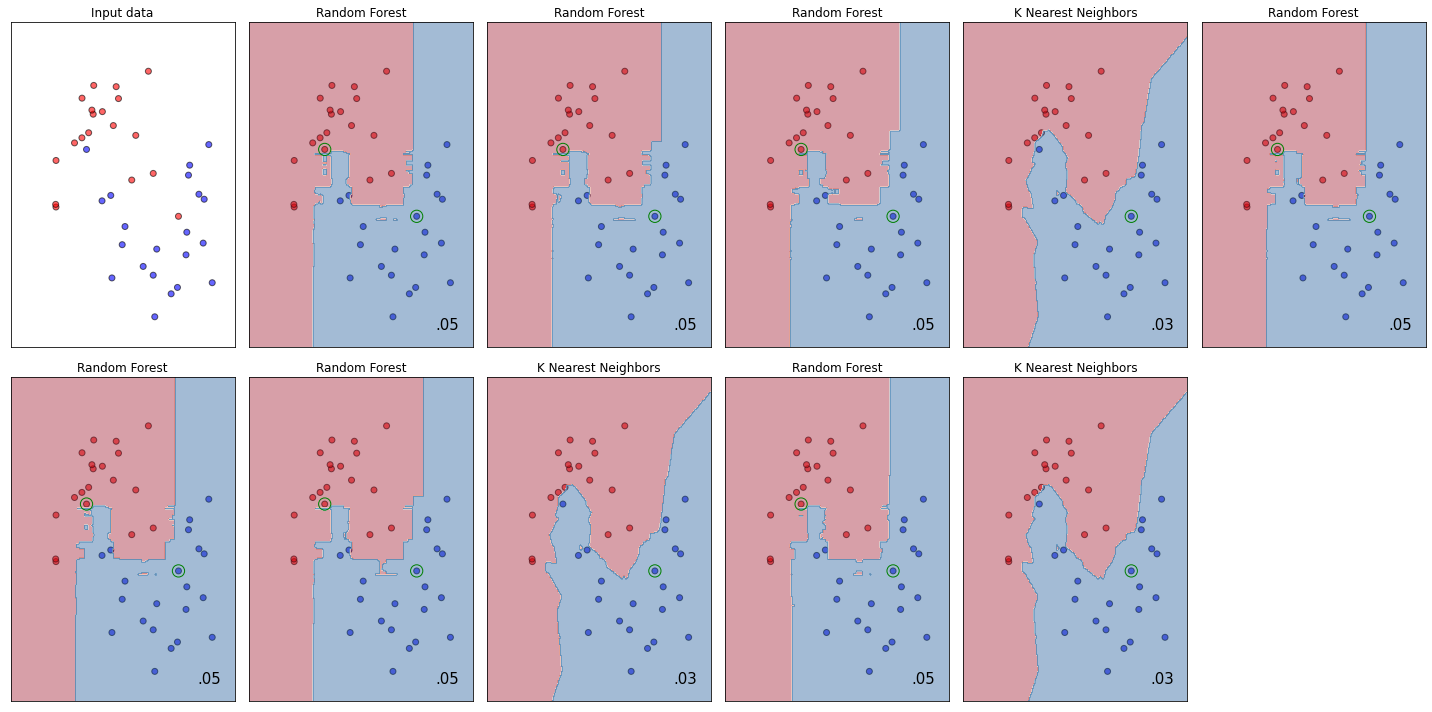

In [9]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

solution_set = my_evolver.hof

# TODO: Algorithms may be non-deterministic so fitness scores may change
# on different plot iterations...?

# Plot populations
# Plot
# Training Set (omitted)
# Subplot 1: Testing Set (Ground Truth)
# Subplot 2: Predictions for Testing Set

cm = plt.cm.RdBu
h = 0.02

cm_bright = ListedColormap(['#FF0000', '#0000FF'])

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                  np.arange(y_min, y_max, h))

figure = plt.figure(figsize=(20, 10))

ax = plt.subplot(2,round(len(solution_set)/2) + 1,1)
# Plot the training points
#ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
#           edgecolors='k')
# Plot the testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
           edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())

ax.set_title("Input data")

for i, ind in enumerate(solution_set):
    algo_name = ind[0]
    param_list = ind
    clf = Classifier.algorithmspace[algo_name](param_list)
    
    predictions = clf.evaluate(training_set, testing_set)

    ax = plt.subplot(2, round(len(solution_set)/2) + 1,i + 2)
    ax.scatter(X_test[:, 0], X_test[:, 1], c=predictions, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    
    score = ClassifierFitness().evaluate(predictions, y_test)
    
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
            size=15, horizontalalignment='right')
    
    # Draw Contour
    contour_set = pipedata()
    contour_set.X = np.c_[xx.ravel(), yy.ravel()]
    # TODO: We have to retrain the data set because we
    # we do not store the classifier created in clf#evaluate
    # anywhere. Consider storing it as an attribute.
    Z = clf.evaluate(training_set, contour_set)
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.4)
    
    # Highlight errors
    # TODO: looks funny, find a way to extract errors without [0]
    errors = np.where(np.not_equal(predictions, y_test))[0]
    for _, mistake in enumerate(errors):
        err = X_test[mistake,:]
        ax.scatter(err[0], err[1], marker='o', s=150, lw=1, color="green", facecolor="none")

    ax.set_title(algo_name)

#print(population)
#print(len(population))
#print(mydata.testing_set.X)
#print(mydata.testing_set.y)
plt.tight_layout()

In [10]:
my_evolver.hof[0]
print(my_evolver.hof)

[['Random Forest', 936, 0.7453, 183, 903, 302], ['Random Forest', 936, 0.3952, 118, 903, 523], ['Random Forest', 596, 0.2049, 46, 128, 228], ['K Nearest Neighbors', 522, 0.3952, 118, 60, 302], ['Random Forest', 37, 0.7583, 950, 925, 545], ['Random Forest', 936, 0.3952, 118, 903, 302], ['Random Forest', 936, 0.7453, 183, 903, 523], ['K Nearest Neighbors', 522, 0.3952, 118, 693, 302], ['Random Forest', 442, 0.6292, 191, 60, 171], ['K Nearest Neighbors', 801, 0.3952, 446, 693, 302]]


# Manual Search

## Playing with Classifiers
**This section of the notebook is not complete.**

This notebook is based on the notebook provided by the scikit learn package located at this [page](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html) and provided at this [link](https://scikit-learn.org/stable/_downloads/3438aba177365cb595921cf18806dfa7/plot_classifier_comparison.ipynb).

The purpose of this notebook to recreate the example in the above notebook using the see implementation of the search space library for Classifiers.

TODO:
Integrate see-classify with Genetic Algorithms (i.e. `GeneticSearch`).

TypeError: cannot unpack non-iterable pipedata object

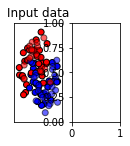

In [11]:
# Set up graph
h = 0.02
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.4, random_state=42)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
ax = plt.subplot(2, len(algorithm_space) + 1, 1)

# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k')
# Plot the testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
           edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())

ax.set_title("Input data")
# Draw subplots
for i, name in enumerate(algorithm_space):
    ax = plt.subplot(2, len(algorithm_space) + 1, i+2)
    X, y = dataset
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # see-classify
    clf = algorithm_space[name]()
    predictions = clf.evaluate(dataset)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(name)
    
    # Print fitness score
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
            size=15, horizontalalignment='right')


plt.tight_layout()
